In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [7]:
veri=pd.read_csv(("earthquake.csv"), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)

In [8]:
data = veri[veri['country'] == 'turkey']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11850 entries, 0 to 24006
Data columns (total 17 columns):
id           11850 non-null float64
date         11850 non-null object
time         11850 non-null object
lat          11850 non-null float64
long         11850 non-null float64
country      11850 non-null object
city         11728 non-null object
area         11735 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        11850 non-null float64
xm           11850 non-null float64
md           11850 non-null float64
richter      11850 non-null float64
mw           2156 non-null float64
ms           11850 non-null float64
mb           11850 non-null float64
dtypes: float64(11), object(6)
memory usage: 1.6+ MB


In [12]:
dups = data.duplicated()
print(dups.sum())

0


In [38]:
features = ['lat','long','depth','xm','md','ms','mw','richter']
x = data.loc[:,features].values
y = data.loc[:,['xm']].values
x=StandardScaler().fit_transform(x)

In [41]:
pca = PCA(n_components=4)
d = pca.fit_transform(x)
da = pd.DataFrame(data = d, columns = ['deneme1','deneme2','deneme3','deneme4'])

In [42]:
da

,deneme1,deneme2,deneme3,deneme4
0,0.555233,-1.085287,-0.373998,-0.987050
1,0.072770,-1.198362,1.407018,0.270356
2,-1.388293,0.576628,0.259145,0.756787
3,-0.334875,-0.813452,0.194445,-0.733808
4,0.608769,-1.277789,1.447712,0.288963
...,...,...,...,...
11845,-0.171321,0.368559,-1.663096,0.144580
11846,-1.154398,-1.139711,-0.345939,0.907373
11847,-0.513608,0.691451,0.084004,1.145290
11848,-0.940172,0.696916,0.166570,0.950113


In [10]:
veri.head(9710)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,2.010000e+13,2014.12.12,12:24:12 AM,37.15,28.80,turkey,mugla,karacaoren,south_east,9.0,7.6,3.8,0.0,3.8,3.5,0.0,0.0
9706,2.010000e+13,2013.07.27,12:13:54 AM,36.97,35.55,turkey,adana,hasanbeyli_saricam,south,9.0,20.8,3.7,0.0,3.7,NaN,0.0,0.0
9707,2.020000e+13,2017.01.04,12:35:07 AM,36.19,29.31,turkey,antalya,gelemis_kas,south,9.0,11.8,3.8,0.0,3.6,3.8,0.0,0.0
9708,2.000000e+13,1999.03.19,12:11:28 AM,39.95,32.08,turkey,ankara,gencali_ayas,north_east,9.0,8.0,3.5,3.5,0.0,NaN,0.0,0.0


#### Veri setindeki satır ve sütun sayısı

In [16]:
veri.shape

(24007, 17)

In [17]:
type(veri)

pandas.core.frame.DataFrame

#### Veri seti featureları

In [18]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
id           24007 non-null float64
date         24007 non-null object
time         24007 non-null object
lat          24007 non-null float64
long         24007 non-null float64
country      24007 non-null object
city         11754 non-null object
area         12977 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        24007 non-null float64
xm           24007 non-null float64
md           24007 non-null float64
richter      24007 non-null float64
mw           5003 non-null float64
ms           24007 non-null float64
mb           24007 non-null float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [19]:
data = veri[veri['country'] == 'turkey']

In [20]:
type(data)

pandas.core.frame.DataFrame

In [2]:
dups_data = data.duplicated()
print(dups_data.sum())

NameError: name 'data' is not defined

In [1]:
type(dups)

NameError: name 'dups' is not defined

In [10]:
data_depth.head()

0    39.04
1    40.79
2    38.58
3    39.47
4    40.80
Name: lat, dtype: float64

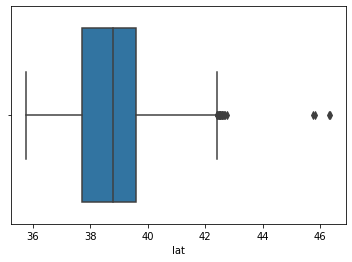

In [11]:
sns.boxplot(x = data_depth); 

In [12]:
Q1 = data_depth.quantile(0.30)
Q3 = data_depth.quantile(0.75)
IQR = Q3 - Q1

In [13]:
Q1

38.0

In [14]:
Q3

39.6

In [15]:
IQR

1.6000000000000014

In [16]:
alt_sinir = Q1 - 1.5*IQR

In [17]:
ust_sinir = Q3 + 1.5*IQR

In [18]:
alt_sinir

35.599999999999994

In [19]:
ust_sinir

42.0

In [20]:
aykiri_tf = (data_depth > ust_sinir)

In [21]:
aykiri_tf

0        False
1        False
2        False
3        False
4        False
         ...  
24002    False
24003    False
24004    False
24005    False
24006    False
Name: lat, Length: 11850, dtype: bool

In [22]:
data_depth[aykiri_tf]

9709     42.02
9735     42.05
9864     42.20
9934     42.14
10009    42.09
10012    42.08
10017    42.13
10018    42.21
10035    42.01
10036    42.40
10039    42.50
10040    42.41
10041    42.40
10042    42.51
10043    42.50
10044    42.40
10045    42.60
10047    42.55
10048    42.60
10049    42.48
10050    42.46
10051    42.63
10052    42.22
10053    42.65
10054    42.48
10055    42.28
10056    42.29
10057    42.31
10058    42.70
10059    42.77
10060    42.41
10061    42.42
10614    42.20
10649    42.30
11405    42.21
11669    42.20
13445    42.40
16640    42.10
16851    42.20
16938    42.10
17744    42.10
18375    45.81
18450    46.35
18832    46.30
19067    42.28
19112    42.07
22288    45.74
23282    42.31
Name: lat, dtype: float64

In [23]:
data3 = data

In [24]:
data3.shape

(11850, 17)

In [139]:
data3 = data3.drop(data3.index[data3['lat'] > 42])

In [140]:
data3.shape

(11802, 17)

In [141]:
data3.head(10)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
5,2.010000e+13,2005.01.21,12:04:03 AM,37.11,27.75,turkey,mugla,demirciler_milas,south_west,0.1,32.8,3.5,3.5,0.0,NaN,0.0,0.0
6,2.010000e+13,2012.06.24,12:07:22 AM,38.75,43.61,turkey,van,ilikaynak,south_west,0.1,9.4,4.5,0.0,4.5,NaN,0.0,0.0
7,1.990000e+13,1987.12.31,12:49:54 AM,39.43,27.98,turkey,balikesir,dikkonak_bigadic,south_east,0.1,26.0,3.8,3.8,0.0,NaN,0.0,0.0
8,2.000000e+13,2000.02.07,12:11:45 AM,40.05,34.07,turkey,kirikkale,kocabas_delice,south_east,0.1,1.0,3.8,3.8,0.0,NaN,0.0,0.0
9,2.010000e+13,2011.10.28,12:47:56 AM,38.76,43.54,turkey,van,degirmenozu,south_east,0.1,3.1,4.3,0.0,4.2,NaN,0.0,4.3


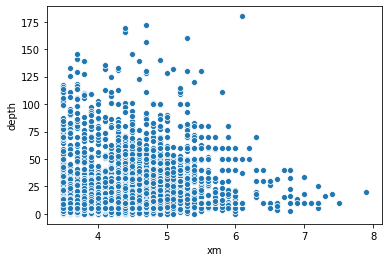

In [142]:
sns.scatterplot(x = "xm",y="depth",data=data3);

In [143]:
data_derinlik = data3["lat"] 

In [144]:
data_derinlik.head()

0    10.0
1     5.2
2     0.0
3    10.0
4     7.0
Name: depth, dtype: float64

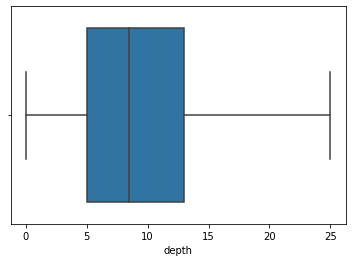

In [196]:
sns.boxplot(x = data_derinlik); 

In [197]:
Q1 = data_derinlik.quantile(0.25)
Q3 = data_derinlik.quantile(0.75)
IQR = Q3 - Q1

In [147]:
alt_sinir = Q1 - 1.5*IQR

In [148]:
ust_sinir = Q3 + 1.5*IQR

In [149]:
alt_sinir

-7.0

In [150]:
ust_sinir

25.0

In [151]:
aykiri_deger = (data_derinlik  > ust_sinir) 

In [152]:
data_derinlik[aykiri_deger].index

Int64Index([    5,     7,    18,    27,    28,    29,    33,    42,    62,
               65,
            ...
            23142, 23173, 23459, 23845, 23870, 23898, 23902, 23951, 23964,
            23995],
           dtype='int64', length=1494)

In [153]:
data_derinlik[aykiri_deger] = ust_sinir

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
data_derinlik[aykiri_deger]

5        25.0
7        25.0
18       25.0
27       25.0
28       25.0
         ... 
23898    25.0
23902    25.0
23951    25.0
23964    25.0
23995    25.0
Name: depth, Length: 1494, dtype: float64

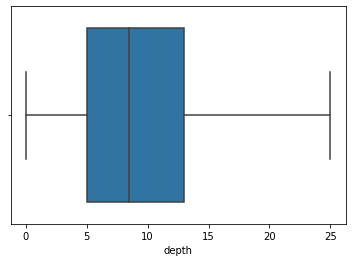

In [155]:
sns.boxplot(x = data_derinlik);

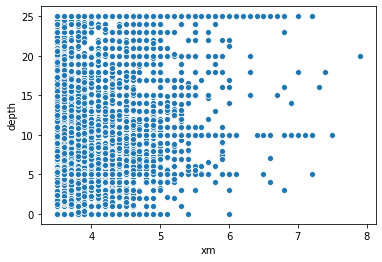

In [156]:
sns.scatterplot(x = "xm",y="depth",data=data3);

In [157]:
data3.shape

(11802, 17)

In [158]:
data3=data3[['lat','long','depth','xm']]

In [159]:
data3.shape

(11802, 4)

In [160]:
data3.isnull().sum()

lat      0
long     0
depth    0
xm       0
dtype: int64

In [48]:
import numpy as np #use numpy for y variable for Linear Regression
y=np.array(da['xm'])

KeyError: 'xm'

In [47]:
X=np.array(da.drop('xm',axis=1))

KeyError: "['xm'] not found in axis"

In [43]:
from sklearn.model_selection import train_test_split  #lets split data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

NameError: name 'X' is not defined

In [164]:
linear=LinearRegression()

In [165]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
data3.shape

(11802, 4)

In [167]:
data3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lat,11802.0,38.729587,1.289901,35.77,37.72,38.77,39.57,42.0
long,11802.0,32.995514,5.832278,25.70,28.19,30.29,38.60,45.0
depth,11802.0,10.054389,7.471731,0.00,5.00,8.50,13.00,25.0
xm,11802.0,3.979207,0.551177,3.50,3.60,3.80,4.20,7.9


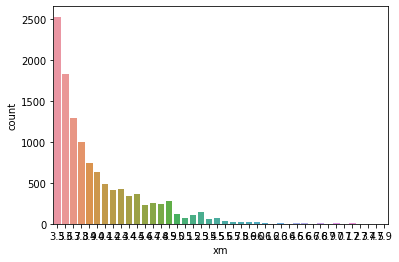

In [168]:
sns.countplot(data3['xm'])

In [171]:
data3['xm'].describe()

count    11802.000000
mean         3.979207
std          0.551177
min          3.500000
25%          3.600000
50%          3.800000
75%          4.200000
max          7.900000
Name: xm, dtype: float64

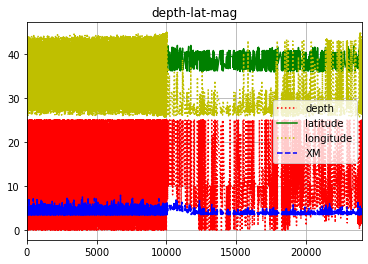

In [176]:

data3.depth.plot(kind="line",grid=True,label="depth",linestyle=":",color="r")
data3.lat.plot(kind="line",grid=True,label="latitude",linestyle="-",color="g")
data3.long.plot(kind="line",grid=True,label="longitude",linestyle=":",color="y")
data3.xm.plot(kind="line",grid=True,label="XM",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("depth-lat-mag")
plt.show()